In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# we are using the logisticRegression for doing the classification
from sklearn.linear_model import LogisticRegression
#we are using the F1 score, confusion matrix for model evaluation
from sklearn.metrics import f1_score,accuracy_score, normalized_mutual_info_score



In [22]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [24]:
df = pd.read_csv('cleaned-dataset.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance	                     3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Previous qualification (grade)                  3630 non-null   float64
 7   Nacionality                                     3630 non-null   int64  
 8   Mother's qualification                          3630 non-null   int64  
 9   Father's qualification                   

In [26]:
df["Target"]

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
3625    Graduate
3626     Dropout
3627     Dropout
3628    Graduate
3629    Graduate
Name: Target, Length: 3630, dtype: object

In [27]:
df['Target'] = df['Target'].replace({'Dropout': 0, 'Graduate': 1})
df["Target"]

0       0
1       1
2       0
3       1
4       1
       ..
3625    1
3626    0
3627    0
3628    1
3629    1
Name: Target, Length: 3630, dtype: int64

 Now that we are done reading the data and preproceesing it we are now going to implement the the logistic regression model.
 **PART 1/2:Training the model on labelled data.**

In [28]:

# Generate indices for splits.
#Here, we are using 1% for training; 25% for testing and creating a 74% unlabelled data

test_ind = round(len(df)*0.25)
# we are adding it to test_ind to get the starting value of the training set
train_ind = test_ind + round(len(df)*0.01)
unlabeled_ind = train_ind + round(len(df)*0.74)


# Partitioning the data frame

test = df.iloc[:test_ind]
train = df.iloc[test_ind:train_ind]
unlabeled = df.iloc[train_ind:unlabeled_ind]


# Assigning data to train, test, and unlabeled sets

X_train = train.drop('Target', axis=1)
Y_train = train.Target

#X_Train(36,36), Y_Train(36) are of the same size

X_unlabeled = unlabeled.drop('Target', axis=1)
#X_unlabeled.shape=(2686,36)
X_test = test.drop('Target', axis=1)
#X_test.shape=(908,36)

Y_test = test.Target
#Y_test.shape=(908,)


In [29]:
# Check dimensions of data after splitting

print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {Y_train.shape}\n")

print(f"X_test dimensions: {X_test.shape}")
print(f"y_test dimensions: {Y_test.shape}\n")

print(f"X_unlabeled dimensions: {X_unlabeled.shape}")

X_train dimensions: (36, 36)
y_train dimensions: (36,)

X_test dimensions: (908, 36)
y_test dimensions: (908,)

X_unlabeled dimensions: (2686, 36)


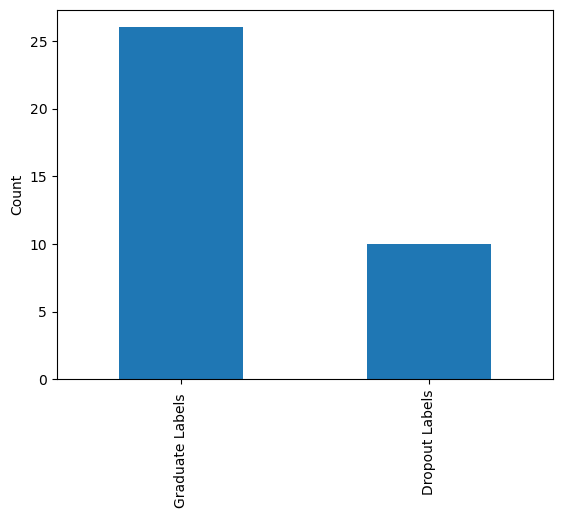

In [30]:
# displaying the ratio of the labels in the training data
Y_train.value_counts().plot(kind='bar')
plt.xticks([0,1], ['Graduate Labels ', 'Dropout Labels'])
plt.ylabel('Count');

In [31]:
#We are using the the logistic Regression to train over the labelled dataset while limiting the maximum number of iterations to 1000
clf = LogisticRegression()
# fitting the model
clf.fit(X_train, Y_train)
#Now that the model is trained on the LABELLED TRAINING DATA, we want to predict the the values
# the representation for such predicted values is "y_hat..."
# the y_hat_test and y_hat_train are the values we got from the model
Y_hat_test = clf.predict(X_test)
#y_hat_train = clf.predict(X_train)



/Users/rithikareddy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We are now done traing the logistic Regression. We want to implement the trained model om the unlabelled data.
**PART 2/2:Using the unlabelled data on the trained Model**

In [33]:
# we are trying to predict the probabilities of both the labels occuring. Since it is a probability, each row adds up to 1
#X_test.shape(908,36)-Reamins consistent
clf.predict_proba(X_test)

array([[8.50261750e-01, 1.49738250e-01],
       [1.87492295e-05, 9.99981251e-01],
       [9.99993905e-01, 6.09508779e-06],
       ...,
       [1.07877962e-04, 9.99892122e-01],
       [0.00000000e+00, 1.00000000e+00],
       [3.76478292e-04, 9.99623522e-01]])

In [34]:
Y_train.shape

(36,)

In [35]:
# Initiate iteration counter.this variable keeps track of the iterations
iterations = 0

# Containers to hold f1_scores,accuracy scores, nmis and # of pseudo-labels
test_accs = []
test_f1s = []
test_nmis=[]
pseudo_labels = []

# Assign value to initiate while loop to keep the iterations going.
high_prob = [1]
# Check shapes of X_train and Y_train
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

# Verify data alignment
#assert X_train.shape[0] == Y_train.shape[0], "Number of samples in X_train and Y_train must match."

# Loop will run until there are no more high-probability pseudo-labels
while len(high_prob) > 0:

    # Fit classifier and make train/test predictions
    print("X_train shape:", X_train.shape)
    print("Y_train shape:", Y_train.shape)
    clf = LogisticRegression(max_iter=2000)
    clf.fit(X_train, Y_train)
    y_hat_test = clf.predict(X_test)

    # Calculate and print iteration # and f1 scores,accuracy score and NMI

    #f1 score
    Test_f1 = f1_score(Y_test, Y_hat_test)
    #test

    #Accuracy Score
    Accuracy_test = accuracy_score(Y_test, Y_hat_test)


    #NMI
    Nmi_score = normalized_mutual_info_score(Y_test, Y_hat_test)


    #print(f"Iteration  number :{iterations}")
    #print(f"The f1 Score: {test_f1} for iteration :{iterations}")
    #print(f"Test Accuracy: {accuracy_test:.2f} for iteration :{iterations}")
    #print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}for iteration :{iterations}")

    test_f1s.append(Test_f1)
    test_accs.append(Accuracy_test)
    test_nmis.append(Nmi_score)

    # Generate predictions and probabilities for unlabeled data
    print(f"Now predicting labels for unlabeled data...")

    #we are predicting the probabilities  in X_unlabeled
    pred_probs = clf.predict_proba(X_unlabeled)

    preds = clf.predict(X_unlabeled)
    prob_0 = pred_probs[:,0]
    prob_1 = pred_probs[:,1]

    # Store predictions and probabilities in dataframe
    df_pred_prob = pd.DataFrame([])
    df_pred_prob['preds'] = preds
    df_pred_prob['prob_0'] = prob_0
    df_pred_prob['prob_1'] = prob_1
    df_pred_prob.index = X_unlabeled.index

    # Separate predictions with > 99% probability
    high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.99],
                            df_pred_prob.loc[df_pred_prob['prob_1'] > 0.99]],
                          axis=0)

    print(f"{len(high_prob)} high-probability predictions added to training data.")

    pseudo_labels.append(len(high_prob))

    # Add pseudo-labeled data to training data
    X_train = pd.concat([X_train, X_unlabeled.loc[high_prob.index]], axis=0)
    Y_train = pd.concat([Y_train, high_prob.preds])

    # Drop pseudo-labeled instances from unlabeled data
    X_unlabeled = X_unlabeled.drop(index=high_prob.index)
    print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")

    # Update iteration counter
    iterations += 1


X_train shape: (36, 36)
Y_train shape: (36,)
X_train shape: (36, 36)
Y_train shape: (36,)
Now predicting labels for unlabeled data...
1721 high-probability predictions added to training data.
965 unlabeled instances remaining.

X_train shape: (1757, 36)
Y_train shape: (1757,)
Now predicting labels for unlabeled data...
281 high-probability predictions added to training data.
684 unlabeled instances remaining.

X_train shape: (2038, 36)
Y_train shape: (2038,)
Now predicting labels for unlabeled data...
116 high-probability predictions added to training data.
568 unlabeled instances remaining.

X_train shape: (2154, 36)
Y_train shape: (2154,)
Now predicting labels for unlabeled data...
68 high-probability predictions added to training data.
500 unlabeled instances remaining.

X_train shape: (2222, 36)
Y_train shape: (2222,)
Now predicting labels for unlabeled data...
44 high-probability predictions added to training data.
456 unlabeled instances remaining.

X_train shape: (2266, 36)
Y_tr

In [36]:
print(f"Self Training Model Accuracy: {Accuracy_test}")
test_f1 = f1_score(Y_test, Y_hat_test)
print(f"F1- score: {Test_f1}")
    #test

    #Accuracy Score
accuracy_test = accuracy_score(Y_test, Y_hat_test)
print(f"Accuracy:{Accuracy_test}")


    #NMI
nmi_score = normalized_mutual_info_score(Y_test, Y_hat_test)
print(f"NMI:{Nmi_score}")

Self Training Model Accuracy: 0.7687224669603524
F1- score: 0.8311897106109325
Accuracy:0.7687224669603524
NMI:0.17486941161017483
